# 📚 RECJOON 추천 모델링을 위한 EDA

<br/>

## 🖊 분석을 시작하기 전에

##### 이 자료는 네이버 부스트캠프 AI Tech 3기 RecSys 14조인 RECognizer 팀원들이 분석한 EDA 자료를 취합하여 정리한 결과입니다.
##### Baekjoon Online Judge(BOJ)와 solved.ac 이용자들의 전반적인 데이터를 파악하는 데 도움이 되도록 comment와 함께 정리했습니다.
##### 분석에 사용한 데이터는 2022년 4월 21일 기준입니다.

<br/>

<br/>

## 📘 전반적인 데이터 훑어보기

### 우선 필요한 라이브러리를 불러올게요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [112]:
import random
import seaborn as sns
import matplotlib as mpl

from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity as cs
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

<br/>

### 수집한 데이터를 확인해봅시다.

In [3]:
df_users = pd.read_csv('../data/users.csv')  # 유저 데이터
df_problems = pd.read_csv('../data/problems.csv')  # 문제 데이터
df_problems_solved = pd.read_csv('../data/problems_solved.csv')  # 유저별 푼 문제 데이터
df_records_solved = pd.read_csv('../data/records_solved.csv')  # 유저별 최근 60개의 '맞혔습니다' 데이터

#### 유저 데이터

In [4]:
display(df_users)

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,5,94,24,1,"394,439,753"
1,2,cki86201,6059,10,31,3231,2781,250,175,10292773001,0,26,3,2,299
2,3,mitnegativeinfinity,2188,10,31,3180,2730,250,175,6393679340,0,12,8,3,440
3,4,ainta,4111,10,31,3135,2685,250,175,6940261423,0,14,2,4,"299,915,1566"
4,5,yclock,2670,10,31,3116,2666,250,175,4132785157,0,14,3,5,"299,439"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65168,65185,zpqmdh,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65169,65186,zumge98,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65170,65187,zxcv123,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65171,65188,zxr83,0,0,0,0,0,0,0,0,0,0,0,63901,NaN


<br/>

#### 문제 데이터

In [5]:
display(df_problems)

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
0,1,1000,A+B,"arithmetic,implementation,math",True,175152,1,2
1,2,1001,A-B,"arithmetic,implementation,math",True,146736,1,1
2,3,1002,터렛,"geometry,math",True,25716,7,4
3,4,1003,피보나치 함수,dp,True,34653,8,3
4,5,1004,어린 왕자,geometry,True,8438,8,2
...,...,...,...,...,...,...,...,...
22983,22984,25028,Fully Generate,"dp,exponentiation_by_squaring,math",True,3,14,2
22984,22985,25029,Joyful KMP,NaN,True,3,22,1
22985,22986,25030,Polynomial Quine,"gaussian_elimination,linear_algebra,math,numbe...",True,2,23,1
22986,22987,25031,Unifying Values,"dp,prefix_sum",True,4,14,1


<br/>

#### 유저별 푼 문제 데이터

In [6]:
display(df_problems_solved)

,id,handle,problems
0,1,koosaga,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1..."
1,2,cki86201,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1..."
2,3,mitnegativeinfinity,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1..."
3,4,ainta,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1..."
4,5,yclock,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1..."
...,...,...,...
63871,63872,ohjcms1,"2557,10718,15596"
63872,63873,steven1010,2557
63873,63874,wwowwww,"1000,1001,1008,1330,2438,2439,2557,2588,2739,2..."
63874,63875,yijh061016,NaN


<br/>

#### 유저별 최근 60개의 '맞혔습니다' 데이터

In [7]:
display(df_records_solved)

,id,handle,problem,timestamp
0,1,koosaga,4139,2022-04-26 20:37:39
1,2,koosaga,24116,2022-04-25 23:47:38
2,3,koosaga,24124,2022-04-25 23:47:25
3,4,koosaga,24125,2022-04-25 23:47:17
4,5,koosaga,24126,2022-04-25 23:47:07
...,...,...,...,...
3000108,3000109,wwowwww,1001,2021-02-22 11:14:45
3000109,3000110,wwowwww,1000,2021-02-22 10:57:44
3000110,3000111,wwowwww,10171,2021-02-22 10:28:05
3000111,3000112,wwowwww,10718,2021-02-18 10:44:08


<br/>

### NA 값이 있는지 우선 확인해봅시다.

In [8]:
df_problems.isna().sum(axis=0)/22988

id                     0.000000
problem_id             0.000000
title                  0.000044
tags                   0.382678
is_solvable            0.000000
accepted_user_count    0.000000
level                  0.000000
average_tries          0.000000
dtype: float64

태그에 NA 값이 전체 데이터에서 약 38% 존재합니다.<br/>
태그를 모델 인풋으로 사용한다면 어떻게 전처리하는게 좋을지 논의가 필요해보이네요.

In [9]:
df_problems[df_problems.tags.isna()==1]

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
172,173,1172,선인장 Automorphisms,NaN,True,6,24,3
190,191,1190,골 세레모니,NaN,True,3,23,9
191,192,1191,게임,NaN,True,5,0,6
192,193,1192,장갑,NaN,True,13,0,3
203,204,1203,게임,NaN,True,4,0,20
...,...,...,...,...,...,...,...,...
22965,22966,25010,지름길,NaN,True,1,26,1
22968,22969,25013,하나 둘 셋,NaN,True,1,0,1
22975,22976,25020,코딩 테스트,NaN,True,0,0,0
22982,22983,25027,August14 Beginner Contest,NaN,True,5,0,10


<br/>

### 문제 데이터의 통계를 살펴볼게요.

In [10]:
df_problems.describe()

,id,problem_id,accepted_user_count,level,average_tries
count,22988.00000,22988.000000,22988.000000,22988.000000,22988.000000
mean,11494.50000,13162.811597,575.048895,9.035149,2.144423
std,6636.20833,6947.628658,4684.972201,8.455286,48.516343
min,1.00000,1000.000000,0.000000,0.000000,0.000000
25%,5747.75000,7315.750000,2.000000,0.000000,1.000000
50%,11494.50000,13333.500000,11.000000,8.000000,1.000000
75%,17241.25000,19156.250000,58.000000,16.000000,2.000000
max,22988.00000,25032.000000,196876.000000,30.000000,7340.000000


average_tries의 max값이 7,340인 데이터는 확인이 필요해보입니다.

<br/>

### 문제 데이터의 각 컬럼의 고유값 개수를 구해봅시다.

In [11]:
print('problem_id 고유값:', df_problems.problem_id.nunique())
print('level 고유값:', df_problems.level.nunique())
print('title 고유값:', df_problems.title.nunique())
print('tag 고유값: ', len(set(sum(df_problems.tags.apply(lambda x: str(x).split(',')).to_list(),[]))))

problem_id 고유값: 22988
level 고유값: 31
title 고유값: 21110
tag 고유값:  186


<br/>

### 문제 데이터의 연속형 변수 컬럼을 확인해봅시다.

#### - accepted_user_count

Text(0.5, 1.0, 'zoom to mean')

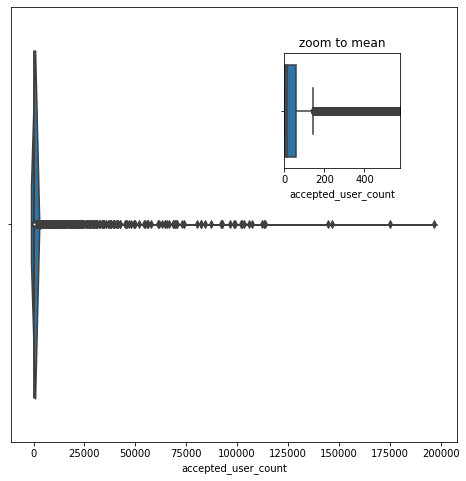

In [12]:
fig, ax= plt.subplots(figsize=[8,8])
ax= sns.boxplot(df_problems.accepted_user_count)
ax= sns.violinplot(df_problems.accepted_user_count)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems.accepted_user_count, ax=ax2)
ax2.set_xlim([0,575])
ax2.set_title('zoom to mean')

문제별 맞은 사람 수가 평균 값인 575 근처로 쏠려있습니다.

#### - average_tries

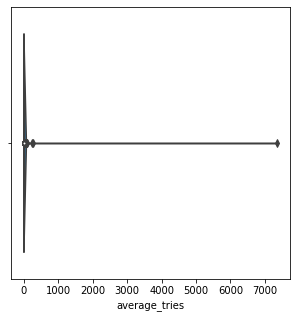

In [13]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems.average_tries)
ax= sns.violinplot(df_problems.average_tries)

In [14]:
df_problems[df_problems.average_tries == 7340]

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
9158,9159,10944,랜덤 게임~~,NaN,True,44,0,7340


문제 시도 횟수에서 이전에 보았던 것처럼 7,340인 이상치가 하나 존재합니다.

Text(0.5, 1.0, 'zoom to mean')

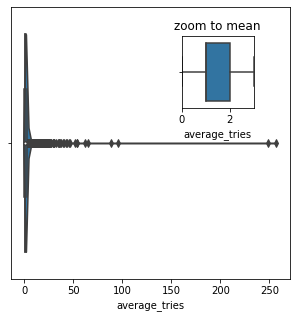

In [15]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems[df_problems.average_tries!=7340].average_tries)
ax= sns.violinplot(df_problems[df_problems.average_tries!=7340].average_tries)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems[df_problems.average_tries!=7340].average_tries, ax=ax2)
ax2.set_xlim([0,3])
ax2.set_title('zoom to mean')

이상치를 제거했을 때 평균값인 2에 평균 시도 횟수가 몰려있습니다.

#### average_tries가 7340인 데이터는 제외하는게 좋을것으로 보입니다.

In [16]:
print('제거 전:', len(df_problems))
df_problems.drop(df_problems[df_problems.average_tries == 7340].index, axis=0, inplace=True)
print('제거 후:', len(df_problems))

제거 전: 22988
제거 후: 22987


<br/>

### 유저가 맞힌 문제 수를 분석해봅시다.

In [17]:
def num(x):
    return len(str(x).split(','))

In [18]:
df_problems_solved['num']= df_problems_solved.problems.apply(num)
df_problems_solved[['id', 'num']]

,id,num
0,1,11226
1,2,6138
2,3,2333
3,4,4280
4,5,2765
...,...,...
63871,63872,3
63872,63873,1
63873,63874,29
63874,63875,1


In [19]:
df_problems_solved.num.describe()

count    63876.000000
mean       133.216764
std        229.644633
min          1.000000
25%         33.000000
50%         73.000000
75%        155.000000
max      11226.000000
Name: num, dtype: float64

유저가 푼 문제 수의 평균은 133개입니다.

Text(0.5, 1.0, 'zoom to mean')

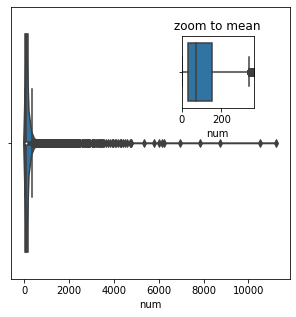

In [20]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems_solved.num)
ax= sns.violinplot(df_problems_solved.num)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems_solved.num, ax=ax2)
ax2.set_xlim([0,363])
ax2.set_title('zoom to mean')

유저의 문제 풀이 수는 평균인 133개에 몰려있네요.

<br/>

### 가장 문제를 많이 푼 유저는 누구일까요?

In [21]:
df_problems_solved[df_problems_solved.num== 11226]

,id,handle,problems,num
0,1,koosaga,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",11226


users에 기록된 koosaga의 solved_count인 11075와 값이 다르네요. 😮<br/>
이는 BOJ와 solved.ac에서 집계하는 문제 수의 차이, 부분 점수가 들어가는 100% 맞지 못한 문제 등 여러 요인으로 인한 것으로 보입니다.

<br/>

### 유저 데이터에서 문제를 하나도 풀지 않은 사람의 수는 몇 명일까요?

In [22]:
print("문제를 한 번도 안 푼 사람의 수 :", len(df_users.loc[df_users['solved_count'] == 0]))

문제를 한 번도 안 푼 사람의 수 : 1297


약 2%의 유저가 문제를 하나도 풀지 않았음을 알 수 있습니다.

<br/>

### 문제의 알고리즘을 분류하는 태그의 종류 수를 구해봅시다.

In [23]:
set_tags = set()
for tags in df_problems['tags'].dropna().values:
    for tag in tags.split(','):
        set_tags.add(tag)

In [24]:
print("tag의 종류 수 :", len(set_tags))

tag의 종류 수 : 185


총 185개의 태그가 존재한다는 걸 알 수 있네요.

<br/>

### 문제의 ID별로 제목, 풀린 횟수 그리고 레벨(티어)을 빠르게 읽을 수 있도록 dictionary 형태로 저장해 봅시다. 😎

In [25]:
id2title = dict() # 문제 id와 title을 딕셔너리로 저장
id2count = dict() # 문제 id별로 풀린 횟수를 세기 위한 딕셔너리 생성
id2level = dict() # 문제 id별로 레벨 딕셔너리
for i in tqdm(range(len(df_problems))):
    id2title[df_problems.iloc[i, 1]] = df_problems.iloc[i, 2]
    id2count[df_problems.iloc[i, 1]] = 0
    id2level[df_problems.iloc[i, 1]] = df_problems.iloc[i, 6]

100%|██████████| 22987/22987 [00:02<00:00, 9372.20it/s]


<br/>

### 채점을 허용하지 않아서 아예 처음부터 풀 수 없는 문제는 무엇일까요?

In [26]:
# is_solvable == False인 것들 확인
non_solvable = df_problems.loc[df_problems['is_solvable'] == False]
non_solvable

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
853,854,1861,경로 찾기,NaN,False,0,0,0
1031,1032,2046,이어달리기,NaN,False,0,0,0
1180,1181,2199,DNA 해독 2,ad_hoc,False,0,15,0
1595,1596,2627,트리회전,NaN,False,0,0,0
1607,1608,2639,주차장,NaN,False,0,0,0
...,...,...,...,...,...,...,...,...
22038,22039,24021,Zathras,NaN,False,0,0,0
22039,22040,24022,Seating Chart,NaN,False,0,0,0
22150,22151,24135,ロゴマーク (Logo),NaN,False,0,0,0
22707,22708,24734,Eerie Shadows,NaN,False,0,0,0


303개의 문제가 풀 수 없는 것으로 나오네요. 😮

<br/>

### 아예 풀 수 없는 문제는 분석에서 제외하는 게 좋겠죠? 🤔

In [27]:
# is_solvable == False 인 문제는 제외
df_problems = df_problems.drop(index=non_solvable.index).reset_index(drop=True)
df_problems

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
0,1,1000,A+B,"arithmetic,implementation,math",True,175152,1,2
1,2,1001,A-B,"arithmetic,implementation,math",True,146736,1,1
2,3,1002,터렛,"geometry,math",True,25716,7,4
3,4,1003,피보나치 함수,dp,True,34653,8,3
4,5,1004,어린 왕자,geometry,True,8438,8,2
...,...,...,...,...,...,...,...,...
22679,22984,25028,Fully Generate,"dp,exponentiation_by_squaring,math",True,3,14,2
22680,22985,25029,Joyful KMP,NaN,True,3,22,1
22681,22986,25030,Polynomial Quine,"gaussian_elimination,linear_algebra,math,numbe...",True,2,23,1
22682,22987,25031,Unifying Values,"dp,prefix_sum",True,4,14,1


<br/>

<br/>

## ⛳️ 문제 레벨(티어) 분석

### 문제 레벨 종류를 확인해 봅시다.

In [28]:
# 문제 level 종류 확인
print(sorted(df_problems['level'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


0부터 30까지의 정수로 이루어져 있네요.

<br/>

### 문제 레벨 분포를 확인해 볼까요?

<AxesSubplot:>

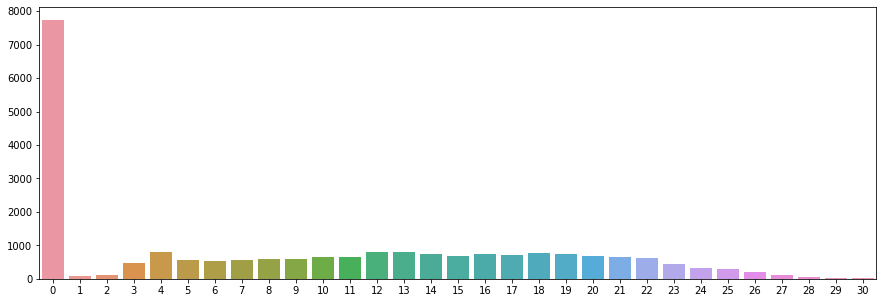

In [29]:
# 문제 level 분포 확인
level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

레벨이 0인 것이 너무 많네요... 😅<br/>
레벨이 0인 문제는 난이도가 매겨지지 않은 문제이므로 이를 제외하여 분포를 다시 한 번 그려볼게요.

In [30]:
# level이 0인 것을 제외한 후 다시 분포를 확인.
df_problems = df_problems.loc[df_problems['level'] != 0].reset_index(drop=True)

<AxesSubplot:>

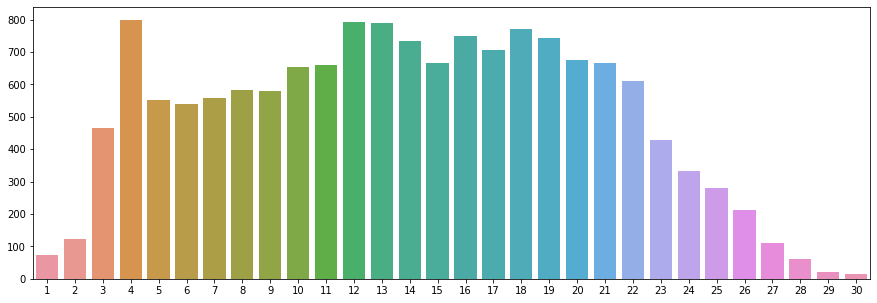

In [31]:
level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

난이도가 매겨진 문제들은 중간 부분의 레벨에 많이 분포해있군요. <br/>
가장 많이 분포한 레벨은 브론즈 2이고, 그 외의 골드 4와 골드 3에도 많이 분포한 것을 볼 수 있습니다. <br/>
즉, 중간 정도의 난이도를 가진 문제들이 대체로 많이 난이도가 매겨졌다고 볼 수 있겠네요.

<br/>

<br/>

## 🧭 유저별 푼 문제 분석

### 유저들이 어떠한 문제를 많이 풀었는지, 어떤 태그 위주의 무제를 주로 풀었는지 분석해봅시다.

In [32]:
# 문제별로 풀린 횟수 계산
for i in tqdm(range(len(df_problems_solved))):
    try:
        pro = list(df_problems_solved.iloc[i, 2].split(','))
        for j in pro:
            j = int(j)
            id2count[j] += 1
    except:
        pass

100%|██████████| 63876/63876 [00:08<00:00, 7842.83it/s] 


In [33]:
# 문제별로 풀린 횟수를 계산한 데이터프레임
# count 컬럼이 풀린 횟수.
df_problem_count = pd.DataFrame({'problem_id' : id2count.keys(), 'count' : id2count.values()})
df_problem_count['title'] = df_problem_count['problem_id'].apply(lambda x : id2title[x])
df_problem_count['level'] = df_problem_count['problem_id'].apply(lambda x : id2level[x])
df_problem_count.sort_values('count', inplace=True, ascending=False)
df_problem_count[:10]

,problem_id,count,title,level
1525,2557,52586,Hello World,1
0,1000,52277,A+B,1
1,1001,47009,A-B,1
8935,10718,44505,We love kriii,1
8,1008,43819,A/B,2
9084,10869,41847,사칙연산,1
9211,10998,41146,A×B,1
1707,2739,40962,구구단,3
327,1330,40912,두 수 비교하기,2
1406,2438,40851,별 찍기 - 1,3


<br/>

### 어떤 태그가 많이 풀렸는지도 알아볼까요?

In [34]:
# is_solvable == True, level > 0인 문제들의 태그 분포 확인
dict_tag_cnt = {i:int(j) for i, j in zip(set_tags, np.zeros(len(set_tags)))}
for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 3]
    try:
        for tag in tags.split(','):
            dict_tag_cnt[tag] += 1
    except:
        pass

100%|██████████| 14947/14947 [00:00<00:00, 41515.41it/s]


In [35]:
# 많이 풀린 tag 횟수에 관한 데이터프레임
# tag_count 컬럼이 각 tag별 풀린 횟수

df_tag_count = pd.DataFrame({'tag' : dict_tag_cnt.keys(), 'tag_count' : dict_tag_cnt.values()})
df_tag_count.sort_values('tag_count', ascending=False, inplace=True)
df_tag_count.reset_index(drop=True, inplace=True)
df_tag_count[:10]

,tag,tag_count
0,math,3838
1,implementation,3416
2,dp,2418
3,graphs,2262
4,data_structures,2221
5,string,1522
6,greedy,1344
7,bruteforcing,1304
8,graph_traversal,1239
9,sorting,1050


추후 대표 태그를 선정해 input으로 사용해도 좋을 것이라고 판단했습니다.

<br/>

### 유저가 최근에 어떠한 문제들을 많이 풀었는지도 알아봅시다.

In [36]:
# 모든 유저가 최근에 풀었던 문제 종류 수
print("모든 유저가 최근에 풀었던 문제 종류 수 :", df_records_solved['problem'].nunique(), "개")

모든 유저가 최근에 풀었던 문제 종류 수 : 11825 개


#### 유저가 같은 문제에 관해 "맞았습니다" 제출을 여러 번 했으면 가장 최근 풀었던 기록만 남겨둘게요.

In [37]:
# 사용자가 똑같은 문제를 풀었다면 최근에 풀었던 기록만 남겨둠.
df_records_solved = df_records_solved.drop_duplicates(subset=('handle', 'problem')).reset_index(drop=True)
df_records_solved

,id,handle,problem,timestamp
0,1,koosaga,4139,2022-04-26 20:37:39
1,2,koosaga,24116,2022-04-25 23:47:38
2,3,koosaga,24124,2022-04-25 23:47:25
3,4,koosaga,24125,2022-04-25 23:47:17
4,5,koosaga,24126,2022-04-25 23:47:07
...,...,...,...,...
2565017,3000108,wwowwww,10869,2021-02-22 11:18:39
2565018,3000110,wwowwww,1000,2021-02-22 10:57:44
2565019,3000111,wwowwww,10171,2021-02-22 10:28:05
2565020,3000112,wwowwww,10718,2021-02-18 10:44:08


<br/>

### 최근 "맞았습니다" 기록에서 문제를 10개 이상 푼 유저의 수는 몇 명일까요?

In [38]:
group_records_solved = df_records_solved.groupby('handle')['problem'].count()
print("문제를 10개 이상 푼 유저의 수 :", len(group_records_solved[group_records_solved >= 10]), '명')

문제를 10개 이상 푼 유저의 수 : 57635 명


만약 "맞았습니다" 데이터를 사용할 수 있으면 약 88%의 유저는 최근에 푼 10개 이상의 문제를 기반으로 좀 더 개인화된 문제를 추천할 수 있겠네요. <br/>
하지만 최근 채점 데이터는 웹 스크레이핑이 불가하므로 추천 모델링에는 사용하기가 어려워보입니다. 😢 <br/>
나중에 기회가 되면 sequential model 제작에 도전해 봐야겠네요. 🧐

<br/>

<br/>

## 🔦 비슷한 문제 탐색 방법 실험해 보기

### 어떤 한 문제와 유사한 문제는 어떻게 찾는 게 좋을까요? 다양한 방법으로 시도해 봅시다!

#### 예시로 문제 1027번과 유사한 문제를 다양한 방법으로 찾아볼게요.

In [39]:
df_problems.loc[df_problems['problem_id'] == 1027]

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries
27,28,1027,고층 건물,"bruteforcing,geometry,math",True,1444,12,2


<br/>

### 우선 cosine 유사도부터 사용해 볼까요?

In [40]:
# 코사인 유사도 기반
df_for_test = df_problems[['problem_id', 'title', 'level', 'average_tries']]
for i in list(list(set_tags)):
    df_for_test[i] = 0

for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 3]
    try:
        for tag in tags.split(','):
            df_for_test.iloc[i, list(df_for_test.columns).index(tag)] += 1
    except:
        pass

temp = df_for_test.iloc[:, 2:].values
sim = cs(temp, temp)

sim_scores = list(enumerate(sim[27]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:20]
print(sim_scores)

100%|██████████| 14947/14947 [00:04<00:00, 3278.71it/s]


[(13399, 1.0), (196, 0.996732097101857), (6516, 0.996732097101857), (990, 0.9966832412776431), (3406, 0.9966832412776431), (14201, 0.9965693281118013), (4852, 0.9965262709260471), (6924, 0.9965262709260471), (7058, 0.9965262709260471), (2696, 0.9963485084679176), (7, 0.9962884370469508), (737, 0.9962884370469508), (5983, 0.9960608976382687), (7572, 0.9959307434419573), (8293, 0.9959307434419573), (9241, 0.9959307434419573), (12497, 0.9959307434419573), (8026, 0.9959063021641593), (995, 0.9954948587295256)]


#### 구한 cosine 유사도 값이 가장 높은 문제 정보를 확인해 봅시다.

In [41]:
idx = np.array(sim_scores)[:, 0]
df_for_cos = df_for_test.iloc[idx]
df_for_cos

,problem_id,title,level,average_tries,smaller_to_larger,bipartite_graph,link_cut_tree,coordinate_compression,prefix_sum,euler_characteristic,...,rb_tree,graph_traversal,sliding_window,topological_sorting,interpreter,splay_tree,pick,hirschberg,bitset,point_in_non_convex_polygon
13399,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,1198,삼각형으로 자르기,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6516,12329,Bullseye (Small),8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,2137,가장 가까운 분수,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,6199,Big Square,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14201,23890,달팽이팽이,13,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,9706,FIND THE MARBLES,11,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6924,12924,멋진 쌍,11,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7058,13140,Hello World!,11,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2696,4995,원과 점,20,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br/>

### 유클리드 거리 기반으로 유사한 문제를 구해봅시다.

#### 그전에 두 좌표 사이의 거리를 구하는 식을 함수로 정의해 놓을게요.

In [42]:
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [43]:
# 유클리드 거리 기반 유사한 문제 구하기
problem_idx = 27
list_dist = []
for i, j in tqdm(enumerate(temp)):
    list_dist.append((i, dist(temp[problem_idx], j)))

14947it [00:00, 66049.35it/s]


In [44]:
list_dist = sorted(list_dist, key = lambda x : x[1])
list_dist = list_dist[:20]
print(list_dist)

[(27, 0.0), (13399, 0.0), (990, 1.0), (3406, 1.0), (380, 1.4142135623730951), (788, 1.4142135623730951), (1843, 1.4142135623730951), (2517, 1.4142135623730951), (4852, 1.4142135623730951), (5210, 1.4142135623730951), (5278, 1.4142135623730951), (5305, 1.4142135623730951), (5486, 1.4142135623730951), (6121, 1.4142135623730951), (6924, 1.4142135623730951), (7058, 1.4142135623730951), (8007, 1.4142135623730951), (8077, 1.4142135623730951), (8848, 1.4142135623730951), (9040, 1.4142135623730951)]


#### 문제간 거리가 가까울수록 유사한 문제입니다.

In [45]:
df_for_euclidean = df_for_test.iloc[np.array(list_dist)[1:,0]]
df_for_euclidean

,problem_id,title,level,average_tries,smaller_to_larger,bipartite_graph,link_cut_tree,coordinate_compression,prefix_sum,euler_characteristic,...,rb_tree,graph_traversal,sliding_window,topological_sorting,interpreter,splay_tree,pick,hirschberg,bitset,point_in_non_convex_polygon
13399,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,2137,가장 가까운 분수,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3406,6199,Big Square,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,1407,2로 몇 번 나누어질까,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,1891,사분면,12,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1843,3164,패턴,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2517,4651,Transmitters,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,9706,FIND THE MARBLES,11,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5210,10381,Joy of Flight,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5278,10477,경운기,12,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


코사인 유사도보다는 유클리드 기반으로 거리가 가까운 문제를 구한 것의 레벨이 전반적으로 비교 대상인 1027번 문제의 레벨과 비슷한 것을 볼 수 있습니다.

In [46]:
df_for_cos[(df_for_cos.bruteforcing == 1) & (df_for_cos.geometry == 1) & (df_for_cos.math == 1)]

,problem_id,title,level,average_tries,smaller_to_larger,bipartite_graph,link_cut_tree,coordinate_compression,prefix_sum,euler_characteristic,...,rb_tree,graph_traversal,sliding_window,topological_sorting,interpreter,splay_tree,pick,hirschberg,bitset,point_in_non_convex_polygon
13399,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,1198,삼각형으로 자르기,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6516,12329,Bullseye (Small),8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2696,4995,원과 점,20,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_for_euclidean[(df_for_euclidean.bruteforcing == 1) & (df_for_euclidean.geometry == 1) & (df_for_euclidean.math == 1)]

,problem_id,title,level,average_tries,smaller_to_larger,bipartite_graph,link_cut_tree,coordinate_compression,prefix_sum,euler_characteristic,...,rb_tree,graph_traversal,sliding_window,topological_sorting,interpreter,splay_tree,pick,hirschberg,bitset,point_in_non_convex_polygon
13399,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


그러나 문제 1027번의 태그와 가장 유사하게 추천된 방법은 코사인 유사도였습니다. <br/>
두 방법을 적절히 조화해서 추천을 하든가, 아니면 레벨과 태그에 관해 필터링 할 때 각 경우에 관해 좀 더 나은 성능을 보이는 방법을 고려해볼 수도 있겠네요. 🙂

<br/>

<br/>

## 🔍 푼 문제가 없지만 경험치 또는 티어가 존재하는 유저

### 푼 문제 수가 0인 유저를 다시 한 번 확인해 봅시다.

In [48]:
df_users[df_users.solved_count == 0]

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
58499,58514,cdmy0417,0,0,0,25,0,0,0,510000,4,4,0,58497,214
58549,58564,jj964254,0,0,0,25,0,0,0,450000,1,1,4,58497,NaN
58576,58591,mulijoa,0,0,0,25,0,0,0,0,0,0,0,58497,NaN
58646,58661,chsun0303,0,0,0,24,0,0,0,0,0,0,0,58645,NaN
58967,58982,b0n0b0n0,0,0,0,22,0,0,0,0,0,0,0,58969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65168,65185,zpqmdh,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65169,65186,zumge98,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65170,65187,zxcv123,0,0,0,0,0,0,0,0,0,0,0,63901,NaN
65171,65188,zxr83,0,0,0,0,0,0,0,0,0,0,0,63901,NaN


In [49]:
print('푼 문제 수가 0인 유저(1,297명) 중 rating이나 exp가 0이 아닌 유저들:',len(df_users[(df_users.solved_count == 0) & ((df_users.rating !=0)|(df_users.exp !=0))]))

푼 문제 수가 0인 유저(1,297명) 중 rating이나 exp가 0이 아닌 유저들: 24


1,297명 중 rating이나 exp가 0이 아닌 유저들은 24명 입니다.
- 해당 유저들은 데이터를 받아오는 solved.ac에서 제재당한 유저일 가능성이 큽니다.
    - 대표적인 solved.ac에서 사용자를 제재하는 경우 : 부정행위로 문제를 맞춘 경우
    - 이와 비슷한 경우로 발생한 데이터로는 푼 문제 수가 0개가 아니지만 rating과 exp가 모두 0인 유저들이 데이터로 남아있습니다.

<br/>

### 1,297명은 푼 문제에 대한 정보가 존재하지 않으므로 해당 유저들은 df_users에서 제거합시다. 🧐

In [50]:
print('solved_count가 0인 유저들 제거 전:', len(df_users))
df_users.drop(df_users[df_users.solved_count == 0].index.to_list(), inplace=True)
print('solved_count가 0인 유저들 제거 전:', len(df_users))

solved_count가 0인 유저들 제거 전: 65173
solved_count가 0인 유저들 제거 전: 63876


<br/>

<br/>

## 🔭 유저 클래스 분석

### 유저 클래스 통계를 확인해봅시다.

In [51]:
df_users.user_class.describe()

count    63876.000000
mean         1.278117
std          1.507171
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: user_class, dtype: float64

<br/>

### class가 0인 유저를 살펴볼까요? 🤔

In [52]:
df_users[df_users.user_class==0]

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
56,57,moonrabbit2,562,0,26,2767,2577,0,165,2134660724,1,0,3,57,"394,439"
66,67,300iq,262,0,26,2740,2588,0,128,1884622368,0,0,0,67,NaN
211,212,aeren,372,0,23,2499,2349,0,148,808995492,0,2,6,212,"323,449"
323,324,admathnoob,262,0,22,2376,2248,0,128,400634682,0,1,6,324,NaN
352,353,snowflake,436,0,22,2350,2170,0,155,367079679,16,19,7,352,"331,461"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64712,64728,ohjcms1,2,0,0,0,0,0,0,0,0,0,0,63900,NaN
64954,64971,steven1010,1,0,0,0,0,0,0,0,0,0,0,63901,NaN
65099,65116,wwowwww,23,0,0,0,0,0,0,0,0,0,0,63901,NaN
65128,65145,yijh061016,127,0,0,0,0,0,0,0,0,0,0,63901,NaN


<br/>

### 푼 문제 수가 0이 아니지만 rating과 exp(경험치)가 모두 0인 유저들

In [53]:
print('class가 0인 유저들 중 rating과 exp가 모두 0인 유저:',len(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]))

class가 0인 유저들 중 rating과 exp가 모두 0인 유저: 11


In [54]:
df_problems_solved[df_problems_solved.handle.isin(list(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]['handle']))]

,id,handle,problems,num
63864,63865,alalala,NaN,1
63865,63866,bojtestaccount,NaN,1
63866,63867,dic05,1000,1
63867,63868,gg8682,1000,1
63869,63870,kvvvvvv3,NaN,1
63870,63871,number,"1220,1533,1616,1699,1912,2239,2580,3090,5820,5...",30
63871,63872,ohjcms1,"2557,10718,15596",3
63872,63873,steven1010,2557,1
63873,63874,wwowwww,"1000,1001,1008,1330,2438,2439,2557,2588,2739,2...",29
63874,63875,yijh061016,NaN,1


이 11명의 유저들 중엔 problems_solved에 기록된 유저(6명)도 있고 아닌 유저도 있습니다.

<br/>

### 유저의 클래스 분포를 확인해봅시다.

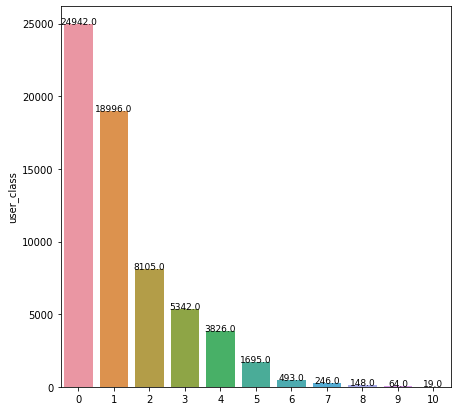

In [55]:
plt.subplots(figsize=(7,7))
df_users.user_class.astype('str')
ax=sns.barplot(df_users.user_class.astype('str').value_counts().index,df_users.user_class.astype('str').value_counts())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3.5, height, ha = 'center', size = 9)

class가 높아질수록 그에 해당하는 유저 수도 감소합니다.

<br/>

<br/>

## 🛡 유저 티어 분석

### 유저 티어 통계를 살펴봅시다.

In [56]:
df_users.tier.describe()

count    63876.000000
mean         7.585008
std          5.018799
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         31.000000
Name: tier, dtype: float64

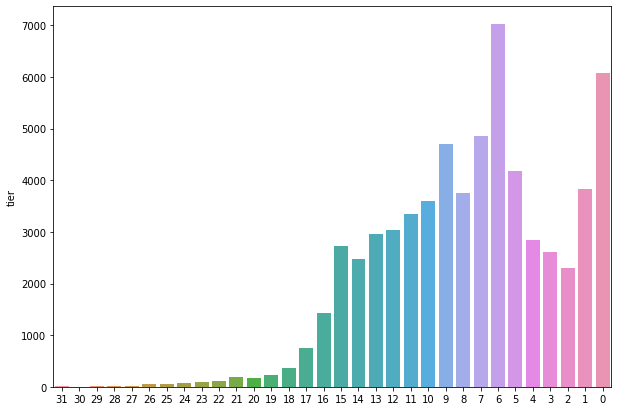

In [57]:
plt.subplots(figsize=(10,7))
df_users.tier.astype('str')
ax=sns.barplot(df_users.tier.astype('str').value_counts().index,df_users.tier.astype('str').value_counts(), order= df_users.tier.astype('str').unique())

user_class와 달리 tier는 0과 6-7(실버 1~2) 티어에 유저들이 많이 분포해있습니다.

<br/>

<br/>

## 🚀 문제 레벨별 데이터 분석

### 문제 레벨별 문제 평균 시도 횟수를 구해봅시다.

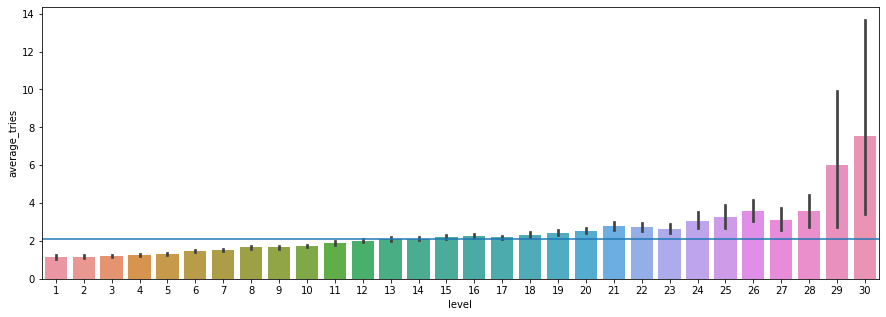

In [58]:
plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.average_tries)
graph.axhline(np.mean(df_problems.average_tries))
plt.show()

<br/>

### 문제 레벨별 맞힌 사람 수의 분포를 구해봅시다.

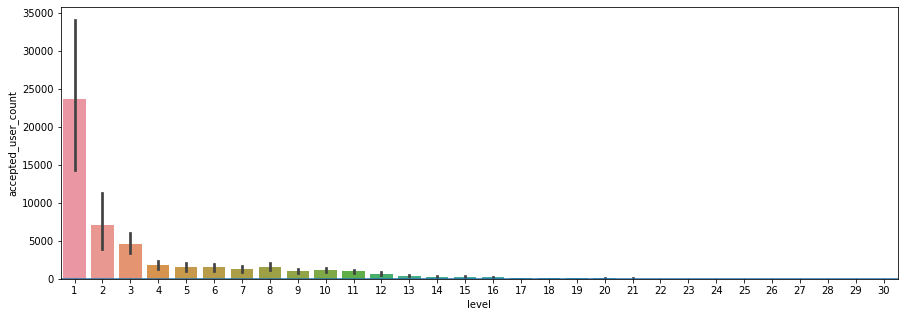

In [59]:
plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.accepted_user_count)
graph.axhline(np.mean(df_problems.average_tries))
plt.show()

<br/>

### 레벨이 1에서 3인 것을 제외하고 살펴볼까요? 🤔

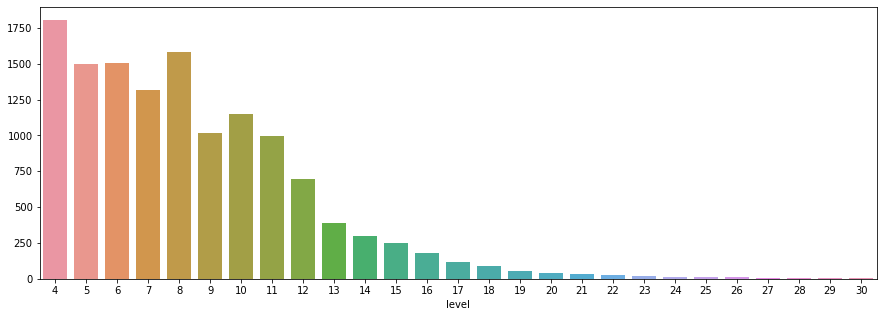

In [60]:
tmp = df_problems.groupby('level')['accepted_user_count'].mean()[df_problems.groupby('level')['accepted_user_count'].mean() < 4000]

plt.figure(figsize=(15,5))
graph = sns.barplot(x=tmp.index, y=tmp.values)
plt.show()

대체로 입문 단계인 하위권 문제가 많이 풀렸고, 하위권 문제를 제외하여도 문제의 난이도가 높아질 수록 맞힌 유저의 수는 급격히 줄어듭니다. 😯

<br/>

### 문제 레벨별 태그를 분석해봅시다.

#### 각 문제 레벨별 태그 종류의 수를 집계해봅시다.

In [61]:
# tag에 nan 값이 있는 행들 삭제
new_df_problems = df_problems.dropna()

# 각 레벨별 태그 유형별 개수 저장
tags_per_level = {}

for x in df_problems.level.unique():
    levelx_tags = ','.join(new_df_problems[new_df_problems.level == x].tags.values).split(',')
    levelx_tags = pd.DataFrame(pd.Series(levelx_tags).value_counts())
    levelx_tags.reset_index(inplace=True, drop=False)
    levelx_tags.columns = ['tag', 'level'+str(x)]
    
    tags_per_level["level" + str(x)] = levelx_tags

<br/>

#### 레벨 1의 태그별 분포는 어떻게 될까요?

In [62]:
# level1인 경우
tags_per_level['level1']

,tag,level1
0,math,47
1,arithmetic,45
2,implementation,41
3,arbitrary_precision,9
4,combinatorics,1
5,simulation,1


<br/>

#### 문제의 레벨별로 몇 종류의 태그가 속해 있을까요?

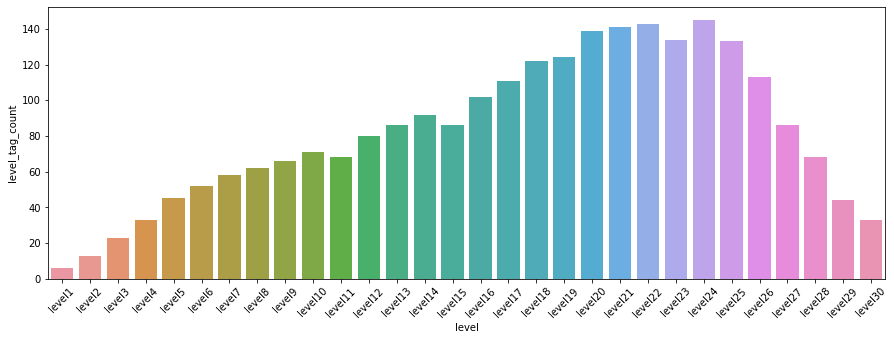

In [63]:
level_tags = pd.DataFrame(columns={'level', 'level_tag_count'})

for i in range(1, 31):
    level_tags = level_tags.append({'level': 'level'+str(i), 'level_tag_count': len(tags_per_level['level'+str(i)])}, ignore_index=True)
    
plt.figure(figsize=(15,5))
graph = sns.barplot(x=level_tags.level, y=level_tags.level_tag_count)

for item in graph.get_xticklabels():
    item.set_rotation(45)

plt.show()

<br/>

<br/>

## 🔑 태그별 문제 레벨 분석

### 각 태그별로 각 레벨에 몇 번 등장하는지를 구해봅시다.

In [64]:
# 각 태그별 모든 레벨 값을 merge한다.
tags_all_level = pd.merge(tags_per_level['level1'], tags_per_level['level2'], on='tag', how='outer')

for i in range(3, 31):
    tags_all_level = pd.merge(tags_all_level, tags_per_level['level'+str(i)], on='tag', how='outer')

In [65]:
tags_all_level.fillna(0, inplace=True)
tags_all_level.head()

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,math,47.0,91.0,340.0,280.0,179.0,156.0,175.0,170.0,175.0,...,140.0,122.0,90.0,67.0,64.0,45.0,29.0,10.0,6.0,4.0
1,arithmetic,45.0,65.0,224.0,129.0,48.0,17.0,13.0,13.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,implementation,41.0,66.0,277.0,608.0,418.0,286.0,242.0,206.0,163.0,...,34.0,31.0,21.0,29.0,20.0,12.0,4.0,6.0,5.0,2.0
3,arbitrary_precision,9.0,2.0,7.0,13.0,4.0,14.0,12.0,10.0,5.0,...,7.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0
4,combinatorics,1.0,1.0,4.0,7.0,10.0,6.0,14.0,22.0,13.0,...,27.0,19.0,24.0,13.0,17.0,12.0,8.0,2.0,2.0,1.0


<br/>

### 각 태그별로 각 레벨에 어떻게 분포되어 있는지를 확인해봅시다.

In [66]:
# 각 레별별 태그의 비율 분포를 확인하기 (상대비교를 위해 각 레벨의 태그 개수를 문제 수 만큼 나누기)
tags_all_level_ratio = tags_all_level.copy()

# 각 레벨별 문제 수 정리
level_ques = pd.DataFrame(new_df_problems.level.value_counts())
level_ques.reset_index(inplace=True, drop=False)
level_ques.columns = ['level', 'nums']

# 각 레벨의 태그 개수에서 문제 수 나누기
for i in range(1, 31):
    tags_all_level_ratio['level'+str(i)] = tags_all_level['level'+str(i)]/level_ques[level_ques['level'] == i].nums.values[0]

In [67]:
tags_all_level_ratio

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,math,0.652778,0.739837,0.732759,0.350438,0.324864,0.288355,0.313620,0.292096,0.302245,...,0.238908,0.240631,0.248619,0.250000,0.268908,0.263158,0.302083,0.212766,0.352941,0.307692
1,arithmetic,0.625000,0.528455,0.482759,0.161452,0.087114,0.031423,0.023297,0.022337,0.018998,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,implementation,0.569444,0.536585,0.596983,0.760951,0.758621,0.528651,0.433692,0.353952,0.281520,...,0.058020,0.061144,0.058011,0.108209,0.084034,0.070175,0.041667,0.127660,0.294118,0.153846
3,arbitrary_precision,0.125000,0.016260,0.015086,0.016270,0.007260,0.025878,0.021505,0.017182,0.008636,...,0.011945,0.009862,0.008287,0.003731,0.004202,0.017544,0.010417,0.021277,0.000000,0.076923
4,combinatorics,0.013889,0.008130,0.008621,0.008761,0.018149,0.011091,0.025090,0.037801,0.022453,...,0.046075,0.037475,0.066298,0.048507,0.071429,0.070175,0.083333,0.042553,0.117647,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,suffix_tree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003731,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000
180,directed_mst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003731,0.000000,0.011696,0.000000,0.000000,0.000000,0.000000
181,a_star,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004202,0.000000,0.000000,0.000000,0.000000,0.000000
182,rb_tree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848,0.000000,0.000000,0.000000,0.000000


<br/>

#### 가장 대표적인 태그인 data_structures를 예시로 상위 레벨에서의 분포를 확인해볼까요? 🤨

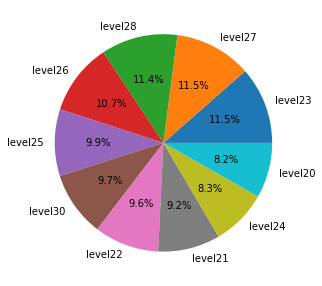

In [68]:
tag_name = 'data_structures'

plt.figure(figsize=(5,5))

x = tags_all_level_ratio[tags_all_level_ratio['tag'] == tag_name].T.iloc[1:,:]
x.columns = ['ratio']
x = x.sort_values('ratio', ascending=False)[:10]

ratio = x['ratio'].values
labels = x.index

#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%')#, explode=explode)
plt.show()

대표적으로 기본이 되는 태그인 data_structures는 난이도별 등장 분포가 골고루 나오기도 합니다.

<br/>

<br/>

## 📨 각 문제의 태그 종류 수 분석

### 각 문제에 태그가 몇 종류 등장하는지를 확인해볼까요?

In [69]:
problem_tags = df_problems.tags.str.split(',')
problem_tags.fillna('0', inplace=True)
df_problems['tag_num'] = problem_tags.apply(lambda x: len(x))
df_problems.head()

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries,tag_num
0,1,1000,A+B,"arithmetic,implementation,math",True,175152,1,2,3
1,2,1001,A-B,"arithmetic,implementation,math",True,146736,1,1,3
2,3,1002,터렛,"geometry,math",True,25716,7,4,2
3,4,1003,피보나치 함수,dp,True,34653,8,3,1
4,5,1004,어린 왕자,geometry,True,8438,8,2,1


<br/>

### 태그가 없는 문제도 tag_num이 1로 집계되는 현상을 없애볼까요? 😀

In [70]:
# null인 인덱스의 태그 값 제거
tags_null_idx = df_problems[df_problems.tags.isnull()].index
df_problems.loc[tags_null_idx, 'tag_num'] -= 1

<br/>

### 문제별 태그 종류 수 분포를 알아봅시다.

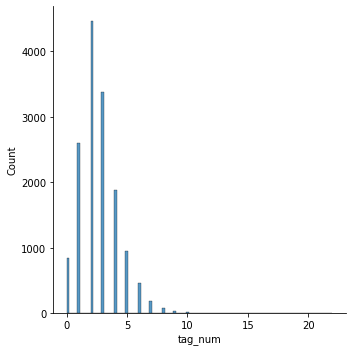

In [71]:
sns.displot(df_problems.tag_num, bins=100)

대체로 문제별로 두 개의 태그가 가장 많이 등장하는 것으로 보이네요.

<br/>

<br/>

## ⚔️ 라이벌과 역라이벌 수 분석

### 유저별 라이벌과 역라이벌 수에 관한 통계를 각각 살펴봅시다.

In [72]:
df_users.rival_count.describe()

count    63876.000000
mean         0.299236
std          2.096559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        146.000000
Name: rival_count, dtype: float64

In [73]:
df_users.reverse_rival_count.describe()

count    63876.000000
mean         0.303666
std          1.654004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         94.000000
Name: reverse_rival_count, dtype: float64

<br/>

### 얼마나 많은 유저가 solved.ac의 라이벌 기능을 이용하고 있을까요?

In [74]:
print('rival 수가 0인 유저 비율:',sum(df_users.rival_count==0)/len(df_users))
print('reverse_rival 수가 0인 유저 비율:',sum(df_users.reverse_rival_count==0)/len(df_users))
print('reverse_rival과 rival 수가 0인 유저 비율:',sum((df_users.reverse_rival_count==0) & (df_users.rival_count==0))/len(df_users))

rival 수가 0인 유저 비율: 0.9186548938568476
reverse_rival 수가 0인 유저 비율: 0.8868119481495398
reverse_rival과 rival 수가 0인 유저 비율: 0.8689335587701171


전체 유저 중 약 87%가 현재 제공되고 있는 라이벌 기능을 사용하지 않고 있네요. 😯 <br/>
대다수의 유저가 라이벌 기능을 사용하지 않는 만큼, 라이벌 추천 서비스를 제공하면 조금이나마 라이벌 기능을 활성화시킬 수 있지 않을까요?

<br/>

<br/>

<br/>

## 🔖 라이벌 관련 실험 및 결과

라이벌에 관해 분석한 데이터를 바탕으로 가설을 세우고 검증해볼게요.<br/>
이를 통해 어떤 방법으로 추천 모델을 만들어야 할지, 필터링은 어떤 식으로 해야할지 고민해 봅시다.

<br/>

### 가설 1: 라이벌이 있는 유저들은 그렇지 않은 유저들에 비해 문제를 더 많이 풉니다.

In [75]:
df_check_rival = df_users.copy()
df_check_rival['has_rival'] = 'NO'

idx = df_check_rival[df_check_rival.rival_count >= 1].index
df_check_rival.loc[idx, 'has_rival'] = 'YES'
df_check_rival

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,5,94,24,1,"394,439,753",YES
1,2,cki86201,6059,10,31,3231,2781,250,175,10292773001,0,26,3,2,299,NO
2,3,mitnegativeinfinity,2188,10,31,3180,2730,250,175,6393679340,0,12,8,3,440,NO
3,4,ainta,4111,10,31,3135,2685,250,175,6940261423,0,14,2,4,"299,915,1566",NO
4,5,yclock,2670,10,31,3116,2666,250,175,4132785157,0,14,3,5,"299,439",NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64712,64728,ohjcms1,2,0,0,0,0,0,0,0,0,0,0,63900,NaN,NO
64954,64971,steven1010,1,0,0,0,0,0,0,0,0,0,0,63901,NaN,NO
65099,65116,wwowwww,23,0,0,0,0,0,0,0,0,0,0,63901,NaN,NO
65128,65145,yijh061016,127,0,0,0,0,0,0,0,0,0,0,63901,NaN,NO


<AxesSubplot:xlabel='has_rival', ylabel='solved_count'>

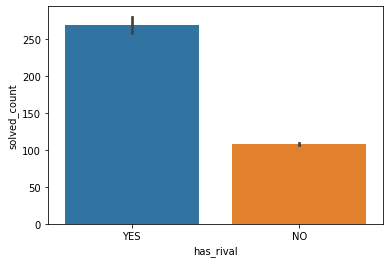

In [76]:
sns.barplot(x='has_rival', y = 'solved_count', data=df_check_rival)

rival이 있는 유저들이 rival이 없는 유저들에 비에 2배 이상 문제를 더 많이 푸네요.<br/>
역시 라이벌 기능을 이용하고 있는 사람은 알고리즘 문제를 대체로 더 많이 푸는 것으로 보입니다.

In [77]:
df_check_rival['has_rival'] = np.where(df_check_rival['has_rival']=='YES', 1 ,0)
stats.pointbiserialr(df_check_rival['has_rival'], df_check_rival['solved_count']).correlation

0.199235382987701

상관관계가 0.1995로 약한 양의 상관관계를 보여주네요.

#### [정리]
- rival의 여부와 문제 푸는 횟수는 약한 양의 상관관계를 보입니다.
- rival이 있는 유저들이 rival이 없는 유저들에 비에 2배 이상의 문제를 더 많이 풉니다.<br/>
→ rival이 있으면 유저들이 문제를 더 많이 풉니다.<br/>
→ rival을 등록할 수 있도록 적절한 라이벌 추천해주면 유저들이 문제를 더 많이 풀어서 개인 실력 향상과 백준 사이트의 활성화에 도움을 줄 것으로 보입니다. 🥳

<br/>

<br/>

### 가설 2: 라이벌이 많을수록 문제를 더 많이 풉니다.

#### 가설 배경: 적절한 추천 라이벌 수를 찾기 위해

In [78]:
df_has_rival = df_check_rival[df_check_rival.has_rival == 1]
df_has_rival

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,5,94,24,1,"394,439,753",1
6,7,gs18115,878,10,31,3097,2649,250,173,3216398172,16,19,65,7,"394,439",1
7,8,dennisstar,907,10,31,3083,2635,250,173,2948927188,17,24,150,8,"394,439",1
8,9,jhnah917,6822,10,31,3071,2621,250,175,3797137474,47,61,278,9,"323,535",1
13,14,rkm0959,3192,9,31,3006,2566,240,175,2964503327,13,20,2,14,"299,439",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63715,63731,silverbell950,1,0,0,2,1,0,1,480,1,0,1,63403,NaN,1
63723,63739,skystrike,1,0,0,2,1,0,1,480,4,0,1,63403,NaN,1
63743,63759,sugosugo222,1,0,0,2,1,0,1,480,2,2,1,63403,323,1
63795,63811,wockd00,1,0,0,2,1,0,1,480,1,0,0,63403,NaN,1


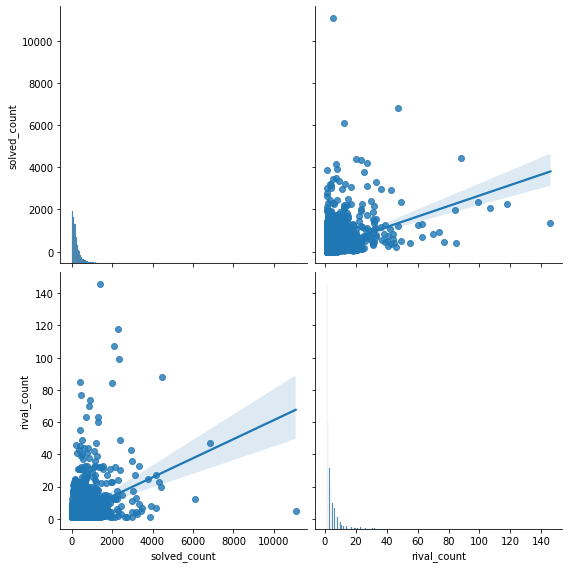

In [79]:
# rival_count와 solved_count와의 관계성을 시각화.

df_for_pairplot = df_has_rival[['solved_count', 'rival_count']]
sns.pairplot(df_for_pairplot, kind='reg', height=4)  # 페어플롯 작성

라이벌 수와 푼 문제 수 간의 약한 관계성이 있어 보입니다.

In [80]:
# 통계적 검정(피어슨 상관계수 검정)을 통해 구체적인 상관관계 파악.
stats.pearsonr(df_has_rival.rival_count, df_has_rival.solved_count)

(0.38345671401796444, 1.2105032628839198e-181)

- 상관관계: 0.385168403093753
- p-value: 1.312496185611437e-184

#### [정리]
- 라이벌이 많을수록 문제를 푸는 횟수와 약한 상관관계를 보입니다.
- 적절히 큰 라이벌 수를 정하면 문제 푸는 횟수가 늘어날 것으로 보입니다.

<br/>

<br/>

### 실험 1: 라이벌이 있는 유저들의 평균적인 라이벌 수는 몇 명일까요?

<AxesSubplot:xlabel='rival_count'>

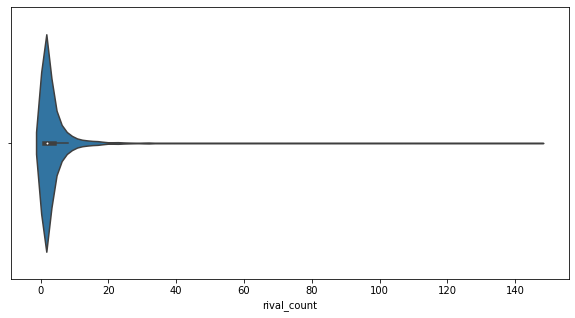

In [81]:
# 실제 데이터의 형상을 보기 위해 바이올린 플롯으로 시각화. https://junklee.tistory.com/9
plt.figure(figsize=(10,5))
sns.violinplot(x='rival_count', data=df_has_rival)

In [82]:
# 라이벌을 100명 이상으로 정한 유저들 확인
df_has_rival[df_has_rival.rival_count >=100]

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
161,162,tlsdydaud1,2277,8,24,2586,2156,230,175,442374230,118,62,185,161,425,1
212,213,dj035,1380,7,23,2496,2076,220,175,260456815,146,80,55,213,"1026,1222",1
480,481,malkoring,2088,7,21,2257,1838,220,175,88942642,107,51,114,481,436,1


(-5.0, 15.0)

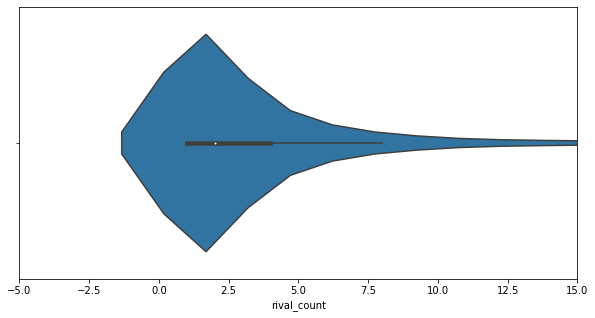

In [83]:
# outside point를 제외한 바이올린 플롯의 부분 확대
plt.figure(figsize=(10,5))
fig = sns.violinplot(x='rival_count', data=df_has_rival)
fig.set_xlim([-5, 15])

In [84]:
# 평균적인 rival 수 확인
print("평균 rival 수:", round(np.mean(df_has_rival.rival_count), 2),'명')

평균 rival 수: 3.68 명


#### [정리]

- outside point: 20명 이상
- upper adjacent values(상위 근접 값: 해당 값보다 크면 이상치로 판별 가능): 8명
- median: 약 2.5명
- mean 약 3.65명

→ rival 수는 2~3명 추천으로 잡아도 될 것으로 보입니다. 😆

<br/>

<br/>

### 실험 2: 라이벌로 지정할 만한 유저를 찾아볼까요?

#### 기준: 나와 비슷한 실력의 유저 또는 나보다 실력이 조금 더 높은 유저

In [85]:
df_users[df_users.handle == '1017hana']

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
26398,26401,1017hana,54,0,8,499,458,0,41,563437,0,1,3,26401,NaN


In [86]:
# tier 8(Silver III) 중  1017hana의 라이벌 찾아보기
df_tier_8 = df_users[df_users.tier == 8]
target_user = '1017hana' # 예시로 쓸 타겟 유저

df_tier_8

,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
26398,26401,1017hana,54,0,8,499,458,0,41,563437,0,1,3,26401,NaN
26399,26402,arch1229,63,0,8,499,452,0,47,2189586,0,0,2,26401,NaN
26400,26403,choyeongwoo_s,63,0,8,499,452,0,47,492016,0,0,3,26401,NaN
26401,26404,cogksdnf314,86,1,8,499,413,25,61,310132,0,0,1,26401,NaN
26402,26405,daeun1284,71,1,8,499,422,25,52,380033,0,0,3,26401,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,30157,unni2,76,1,8,400,320,25,55,240993,0,0,0,30116,NaN
30155,30158,whwkahd3,79,2,8,400,293,50,57,127068,0,0,6,30116,NaN
30156,30159,xpmxf4,83,1,8,400,315,25,60,158675,0,0,6,30116,NaN
30157,30160,ydkhs0513,92,1,8,400,310,25,65,136655,0,0,1,30116,NaN


<br/>

#### 1. 타겟 유저와 같거나 한 단계 높은 티어로 실력 범위를 줄입니다.

In [87]:
print('후보수 전:', len(df_users)-1)

df_tier_9 = df_users[df_users.tier == 9]
df_candi_by_tier = pd.concat([df_tier_8, df_tier_9], axis=0)

print('후보수 후:', len(df_candi_by_tier)-1)
df_candi_by_tier.head()

후보수 전: 63875
후보수 후: 8452


,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
26398,26401,1017hana,54,0,8,499,458,0,41,563437,0,1,3,26401,NaN
26399,26402,arch1229,63,0,8,499,452,0,47,2189586,0,0,2,26401,NaN
26400,26403,choyeongwoo_s,63,0,8,499,452,0,47,492016,0,0,3,26401,NaN
26401,26404,cogksdnf314,86,1,8,499,413,25,61,310132,0,0,1,26401,NaN
26402,26405,daeun1284,71,1,8,499,422,25,52,380033,0,0,3,26401,NaN


<br/>

#### 2. rating_by_problems_sum(푼 문제의 난이도 합으로 계산한 사용자의 레이팅)이 비슷한 유저들로 범위 줄이기

In [88]:
t_rating_b_problems_sum = df_tier_8[df_tier_8.handle == target_user].rating_by_problems_sum.values[0] 
print(target_user+'의 rating_by_problems_sum:', t_rating_b_problems_sum)

1017hana의 rating_by_problems_sum: 458


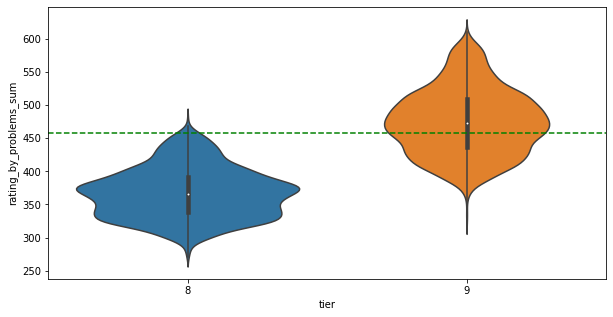

In [89]:
# target user가 속한 티어와 한 단계 높은 티어와의 rating_by_problems_sum 분포 확인
# 초록색 점선: target user의 rating_by_problems_sum

plt.figure(figsize=(10,5))
sns.violinplot(x="tier", y="rating_by_problems_sum", data=df_candi_by_tier)
plt.axhline(y=t_rating_b_problems_sum, color='g', linestyle='--')

- 타겟 유저는 현재 속한 티어에서 상위권 유저임을 알 수 있습니다.
- 한 단계 높은 레벨에서도 비교적 중위권에 속함을 알 수 있습니다.
- 타겟 유저보다 rating_by_problems_sum이 100(임시) 높은 유저로 바운더리 정하는 게 좋아 보입니다. 🙂

In [90]:
# 타겟 유저의 rating_by_problems_sum <= 후보군 rating_by_problems_sum <= 타겟 유저의 rating_by_problems_sum + 100
threshold = 100

print('후보수 후:', len(df_candi_by_tier)-1)
df_candi_by_rbps = df_candi_by_tier[(df_candi_by_tier.rating_by_problems_sum >= t_rating_b_problems_sum) & (df_candi_by_tier.rating_by_problems_sum <= t_rating_b_problems_sum+threshold)]
print('후보수 후:',len(df_candi_by_rbps)-1)
df_candi_by_rbps.head()

후보수 후: 8452
후보수 후: 2641


,id,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
26398,26401,1017hana,54,0,8,499,458,0,41,563437,0,1,3,26401,NaN
26404,26407,dhtjs1123,45,0,8,499,464,0,35,1840370,0,0,0,26401,"202,750"
26406,26409,esbr17,51,0,8,499,460,0,39,739971,0,0,2,26401,NaN
26417,26420,keumi1004,44,0,8,499,464,0,35,952518,0,0,1,26401,NaN
26425,26428,sangho_kil,24,0,8,499,480,0,19,176929284,0,0,0,26401,NaN


In [91]:
df_usp = pd.merge(df_users, df_problems_solved, on='handle')
# null이 담긴 사용자 제거
df_usp = df_usp[~df_usp.problems.isnull()]
df_usp

,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id_y,problems,num
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,5,94,24,1,"394,439,753",1,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",11226
1,2,cki86201,6059,10,31,3231,2781,250,175,10292773001,0,26,3,2,299,2,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",6138
2,3,mitnegativeinfinity,2188,10,31,3180,2730,250,175,6393679340,0,12,8,3,440,3,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1...",2333
3,4,ainta,4111,10,31,3135,2685,250,175,6940261423,0,14,2,4,"299,915,1566",4,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",4280
4,5,yclock,2670,10,31,3116,2666,250,175,4132785157,0,14,3,5,"299,439",5,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",2765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63868,64350,hihimotga,6,0,0,0,0,0,0,1920,0,0,0,63900,NaN,63869,"1237,2555,10943,15643,15802,15913",6
63870,64720,number,26,0,0,0,0,0,0,0,0,0,0,63900,NaN,63871,"1220,1533,1616,1699,1912,2239,2580,3090,5820,5...",30
63871,64728,ohjcms1,2,0,0,0,0,0,0,0,0,0,0,63900,NaN,63872,"2557,10718,15596",3
63872,64971,steven1010,1,0,0,0,0,0,0,0,0,0,0,63901,NaN,63873,2557,1


<br/>

#### 3. 타겟 유저 푼 태그 기반으로 나의 부족한 점을 더 많이 푼 유저 찾기

In [92]:
df_problems = df_problems[df_problems.level != 0]
# not_solvable == False만
df_problems = df_problems[df_problems.is_solvable == True]
# tag가 nan인 문제 제거
df_problems = df_problems[~df_problems.tags.isnull()]
df_problems.head()

,id,problem_id,title,tags,is_solvable,accepted_user_count,level,average_tries,tag_num
0,1,1000,A+B,"arithmetic,implementation,math",True,175152,1,2,3
1,2,1001,A-B,"arithmetic,implementation,math",True,146736,1,1,3
2,3,1002,터렛,"geometry,math",True,25716,7,4,2
3,4,1003,피보나치 함수,dp,True,34653,8,3,1
4,5,1004,어린 왕자,geometry,True,8438,8,2,1


In [93]:
# 후보 유저들만 추리기
candi_users = df_candi_by_rbps.handle.values
df_usp_candi = df_usp[df_usp.handle.isin(candi_users)]
df_usp_candi

,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id_y,problems,num
21706,21708,chb09876,111,2,9,649,524,50,75,452740,6,5,2,21708,222,21707,"1000,1001,1002,1008,1011,1018,1065,1085,1110,1...",113
21707,21709,dhdgn,75,2,9,649,544,50,55,691698,0,1,6,21708,229,21708,"1003,1012,1018,1026,1058,1065,1149,1152,1157,1...",83
21708,21710,dnrgus1127,107,2,9,649,526,50,73,446712,0,0,2,21708,245,21709,"1000,1001,1003,1008,1009,1011,1012,1018,1037,1...",109
21709,21711,ehdrms3825,102,2,9,649,529,50,70,421785,0,0,2,21708,NaN,21710,"1000,1001,1002,1003,1004,1008,1010,1011,1012,1...",109
21710,21712,eunchae9999,105,2,9,649,527,50,72,1184691,1,2,1,21708,NaN,21711,"1000,1001,1003,1008,1018,1062,1065,1085,1094,1...",107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26633,26636,l9960204,43,0,8,493,459,0,34,1595207,0,0,2,26618,NaN,26634,"1000,1003,1012,1085,1120,1149,1152,1157,1158,1...",147
26636,26639,mye0412,43,0,8,493,459,0,34,1427111,0,0,2,26618,NaN,26637,"1074,1080,1107,1158,1167,1182,1197,1201,1208,1...",152
26662,26665,edward0831,39,0,8,492,461,0,31,1715797,1,1,1,26658,NaN,26663,"2557,3190,5373,12100,13458,13460,14499,14500,1...",42
26706,26709,nebula64,38,0,8,491,461,0,30,3356758,0,0,0,26693,"331,500",26707,"1014,1039,1062,1068,1072,1103,1697,1713,1753,1...",40


In [94]:
# 필요한 태그 칼럼 정리하기
tags = ['math', 'implementation', 'greedy', 'string', 'data-structures', 'geometry', 'dp', 'dfs', 'bfs']
for x in tags:
    df_usp_candi[x] = 0

df_usp_candi

,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,...,num,math,implementation,greedy,string,data-structures,geometry,dp,dfs,bfs
21706,21708,chb09876,111,2,9,649,524,50,75,452740,...,113,0,0,0,0,0,0,0,0,0
21707,21709,dhdgn,75,2,9,649,544,50,55,691698,...,83,0,0,0,0,0,0,0,0,0
21708,21710,dnrgus1127,107,2,9,649,526,50,73,446712,...,109,0,0,0,0,0,0,0,0,0
21709,21711,ehdrms3825,102,2,9,649,529,50,70,421785,...,109,0,0,0,0,0,0,0,0,0
21710,21712,eunchae9999,105,2,9,649,527,50,72,1184691,...,107,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26633,26636,l9960204,43,0,8,493,459,0,34,1595207,...,147,0,0,0,0,0,0,0,0,0
26636,26639,mye0412,43,0,8,493,459,0,34,1427111,...,152,0,0,0,0,0,0,0,0,0
26662,26665,edward0831,39,0,8,492,461,0,31,1715797,...,42,0,0,0,0,0,0,0,0,0
26706,26709,nebula64,38,0,8,491,461,0,30,3356758,...,40,0,0,0,0,0,0,0,0,0


In [106]:
def class_user_tag(df):    
    # 특정 유저가 푼 problems 구하기
    for user in tqdm(candi_users):
        if (len(df[df.handle == user].problems.values) == 0):
            continue;
        df_one_user_problems = df[df.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # 특정 유저가 푼 problems의 태그 값들 구하기
        user_tag = []
        for i in range(len(one_user_problems)):
            one_problem = df_problems[df_problems.problem_id == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # 특정 유저의 태그 칼럼에 각 태그 값 넣기
        idx = df[df['handle'] == user].index
        for k, v in counts.items():
            if k in df.columns:
                df.loc[idx, k] = v

    return df

In [107]:
df_candi_with_tags = class_user_tag(df_usp_candi)

100%|██████████| 2642/2642 [02:04<00:00, 21.21it/s]


In [108]:
# 라이벌 유저군들의 푼 태그 수와 타겟 유저가 푼 태그 수 확인
df_target_candi_tags = pd.DataFrame(df_candi_with_tags.sum(axis=0)[tags]).reset_index()
df_target_candi_tags.columns = ['tags', 'num']
df_target_candi_tags.num = df_target_candi_tags.num/len(df_candi_with_tags)

target_tags_values = df_candi_with_tags[df_candi_with_tags.handle == target_user][tags].values
df_target_candi_tags['target'] = target_tags_values[0]
df_target_candi_tags

,tags,num,target
0,math,43.627421,9
1,implementation,51.781998,3
2,greedy,5.479301,8
3,string,12.44436,7
4,data-structures,0.0,0
5,geometry,2.731105,1
6,dp,9.339537,11
7,dfs,3.495632,5
8,bfs,5.723889,9


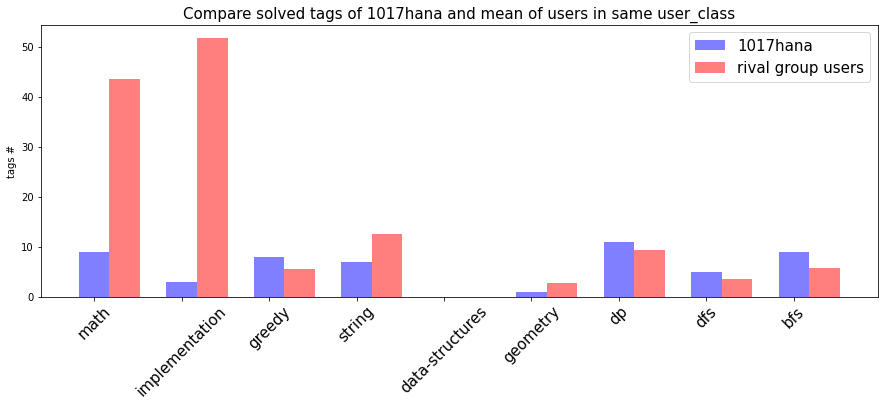

In [109]:
# 라이벌 유저군 보다 내가 부족한 태그 부분 확인
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

plt.figure(figsize=(15,5))
p1 = plt.bar(index, df_target_candi_tags.target, bar_width, 
             color='b', alpha=alpha,label=target_user)

p2 = plt.bar(index + bar_width, df_target_candi_tags.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+target_user+' and mean of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (target_user, 'rival group users'), fontsize=15)
plt.show()

- 타겟 유저는 라이벌 유저군보다 Implementation, math를 적게 풀었습니다.
- greedy, dp, dfs, bfs는 더 많이 풀었음을 알 수 있네요. 😎

In [110]:
need_more_tags = df_target_candi_tags[df_target_candi_tags.num > df_target_candi_tags.target].tags.values
need_more_tags

array(['math', 'implementation', 'string', 'geometry'], dtype=object)

In [111]:
# 라이벌 유저군들 중에서 내가 부족한 부분을 더 공부한 유저 확인
tag_candi = df_candi_with_tags.copy()

print('후보수 후:',len(df_candi_by_rbps)-1)
for x in need_more_tags:
    tag_candi = tag_candi[tag_candi[x] >= tag_candi[tag_candi.handle==target_user][x].values[0]]
    print(x+' 태그 필터링 후: ', end='')
    print(len(tag_candi)-1)

후보수 후: 2641
math 태그 필터링 후: 2416
implementation 태그 필터링 후: 2407
string 태그 필터링 후: 1953
geometry 태그 필터링 후: 1698


<br/>

#### 4. 후보군들 중 랜덤으로 3명을 추출해봅니다.

In [113]:
seed = 42

fin_candi = tag_candi[tag_candi.handle != target_user].reset_index()

seq = list(np.arange(len(fin_candi)))
random.seed(seed)
target_rivals_3 = random.sample(seq, 3)
target_rivals_3

[1309, 228, 51]

In [114]:
fin_candi.iloc[target_rivals_3]

,index,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,...,num,math,implementation,greedy,string,data-structures,geometry,dp,dfs,bfs
1309,23726,23729,ioolvv,100,2,9,580,461,50,69,...,102,53,52,1,10,0,6,9,0,0
228,22047,22049,qazxcv0691,110,2,9,636,512,50,74,...,113,60,58,3,11,0,6,5,2,4
51,21780,21782,dhs632,97,2,9,646,529,50,67,...,99,44,43,2,18,0,5,1,0,0


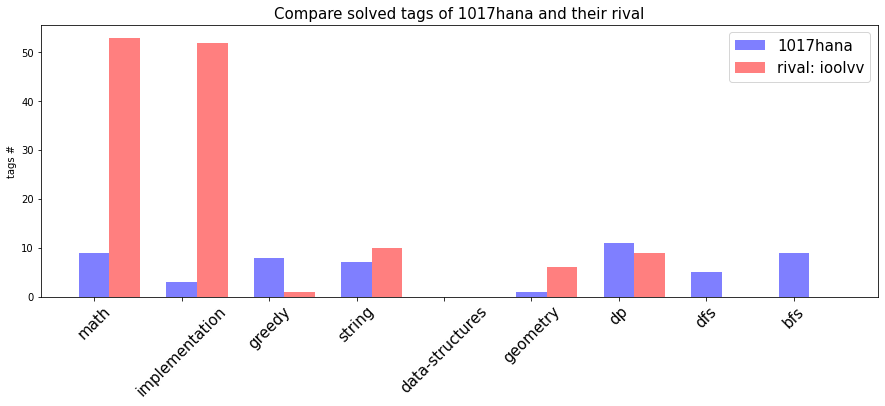

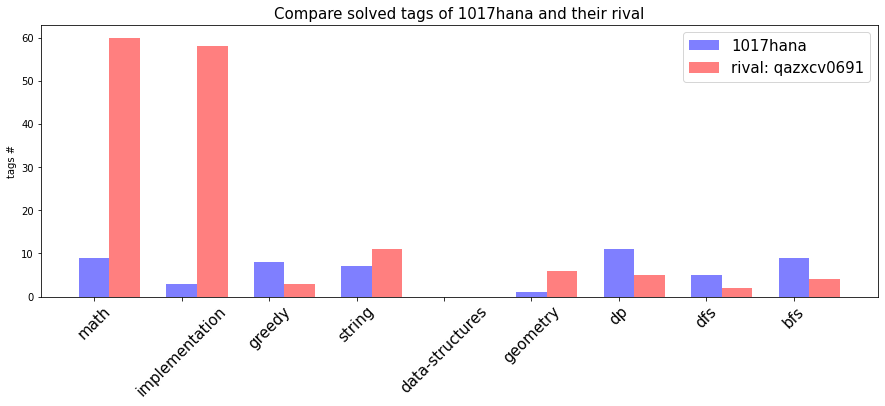

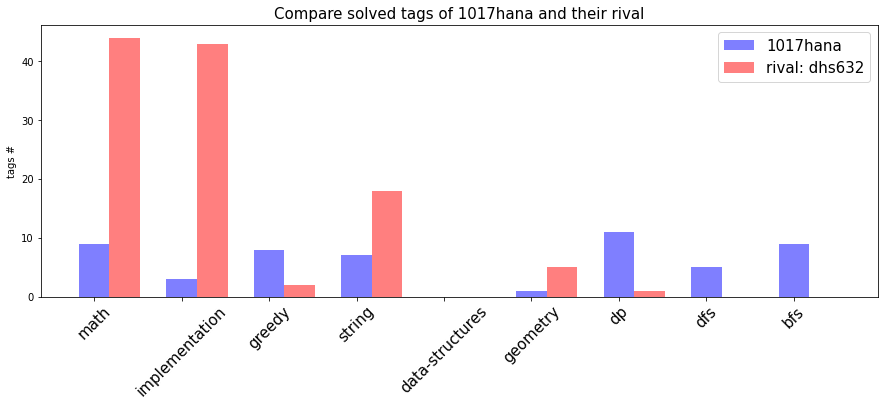

In [115]:
# 라이벌 유저군 보다 내가 부족한 태그 부분 확인
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

for i in range(3):
    rival_data = fin_candi.iloc[target_rivals_3[i]]
    plt.figure(figsize=(15,5))
    p1 = plt.bar(index, tag_candi[tag_candi.handle == target_user][tags].values[0], bar_width, 
                color='b', alpha=alpha,label=target_user)

    p2 = plt.bar(index + bar_width, rival_data[tags].values, bar_width, 
                color='r', alpha=alpha,label='mean_users')

    plt.title('Compare solved tags of '+target_user+' and their rival', fontsize=15)
    plt.ylabel('tags #', fontsize=10)
    #plt.xlabel('tags', fontsize=18)
    plt.xticks(index, label, fontsize=15, rotation=45)
    plt.legend((p1[0], p2[0]), (target_user, 'rival: '+rival_data.handle), fontsize=15)
    plt.show()

비슷한 라이벌과 비교했을 때 타겟 유저가 상대적으로 덜 푼 태그 유형이 보이네요.<br/>

<br/>

<br/>

<br/>

## 💡 유저와 문제풀이 관련 실험 및 결과

유저와 문제 풀이에 관해 분석한 데이터를 바탕으로 가설을 세우고 검증해볼게요.<br/>
이를 통해 어떤 방법으로 추천 모델을 만들어야 할지, 필터링은 어떤 식으로 해야할지 고민해 봅시다.

<br/>

<br/>

### 가설. 유저 클래스별 많이 푸는 태그 유형이 있을 것입니다.

#### 우선 unique한 태그 값을 구하여 새로운 칼럼으로 추가해 봅시다. 😏

In [116]:
unique_tags = []
all_tags = df_problems.tags.str.split(',').values

for x in all_tags:
    unique_tags.extend(x)
    
unique_tags = set(unique_tags)

In [117]:
# 새로운 칼럼으로 추가하기
tmp = df_usp.copy()

for x in unique_tags:
    tmp[x] = 0
tmp

,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,...,rb_tree,graph_traversal,sliding_window,topological_sorting,interpreter,splay_tree,pick,hirschberg,bitset,point_in_non_convex_polygon
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,...,0,0,0,0,0,0,0,0,0,0
1,2,cki86201,6059,10,31,3231,2781,250,175,10292773001,...,0,0,0,0,0,0,0,0,0,0
2,3,mitnegativeinfinity,2188,10,31,3180,2730,250,175,6393679340,...,0,0,0,0,0,0,0,0,0,0
3,4,ainta,4111,10,31,3135,2685,250,175,6940261423,...,0,0,0,0,0,0,0,0,0,0
4,5,yclock,2670,10,31,3116,2666,250,175,4132785157,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63868,64350,hihimotga,6,0,0,0,0,0,0,1920,...,0,0,0,0,0,0,0,0,0,0
63870,64720,number,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63871,64728,ohjcms1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63872,64971,steven1010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
sorted(list(tmp.user_class.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [126]:
def class_user_tag(user_class):

    users = tmp[tmp.user_class == user_class].handle.values
    
    # 특정 유저가 푼 problems 구하기
    for user in tqdm(users):
        df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # 특정 유저가 푼 problems의 태그 값들 구하기
        user_tag = []
        for i in range(len(one_user_problems)):
            one_problem = df_problems[df_problems.problem_id == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # 특정 유저의 태그 칼럼에 각 태그 값 넣기
        idx = tmp[tmp['handle'] == user].index
        for k, v in counts.items():
            tmp.loc[idx, k] = v

    return tmp

In [127]:
# 클래스 10인 유저가 많이 푼 태그 목록
class_num = 10

tmp_10 = class_user_tag(class_num)
tags_10_sum = pd.DataFrame(tmp_10[tmp_10.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_10_sum.columns = ['tag', 'num']
tags_10_sum = tags_10_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_10_sum#.head()

100%|██████████| 19/19 [00:22<00:00,  1.20s/it]


,tag,num
0,math,15201
1,implementation,12845
2,data_structures,9368
3,dp,9159
4,graphs,8114
...,...,...
179,discrete_sqrt,5
180,rb_tree,3
181,pick,3
182,generating_function,2


In [128]:
# 클래스 6인 유저가 많이 푼 태그 목록
class_num = 6

tmp_6 = class_user_tag(class_num)
tags_6_sum = pd.DataFrame(tmp_6[tmp_6.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_6_sum.columns = ['tag', 'num']
tags_6_sum = tags_6_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_6_sum.head(10)

100%|██████████| 493/493 [02:30<00:00,  3.28it/s]


,tag,num
0,math,102784
1,implementation,100013
2,graphs,57938
3,dp,56555
4,data_structures,48240
5,graph_traversal,36531
6,arithmetic,35454
7,string,34259
8,bruteforcing,28813
9,sorting,26934


In [129]:
# 클래스 3인 유저가 많이 푼 태그 목록
class_num = 3

tmp_3 = class_user_tag(class_num)
tags_3_sum = pd.DataFrame(tmp_3[tmp_3.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_3_sum.columns = ['tag', 'num']
tags_3_sum = tags_3_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_3_sum.head(10)

100%|██████████| 5326/5326 [10:01<00:00,  8.86it/s]


,tag,num
0,implementation,475529
1,math,414880
2,arithmetic,179009
3,dp,150415
4,graphs,149483
5,string,138131
6,data_structures,129951
7,graph_traversal,123421
8,bruteforcing,107981
9,sorting,107517


In [130]:
# 클래스 0인 유저가 많이 푼 태그 목록
class_num = 0

tmp_0 = class_user_tag(class_num)
tags_0_sum = pd.DataFrame(tmp_0[tmp_0.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_0_sum.columns = ['tag', 'num']
tags_0_sum = tags_0_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_0_sum.head(10)

100%|██████████| 24763/24763 [12:29<00:00, 33.04it/s]


,tag,num
0,implementation,468440
1,math,360208
2,arithmetic,182230
3,graphs,154133
4,dp,138431
5,graph_traversal,121764
6,bruteforcing,104355
7,data_structures,103389
8,bfs,99638
9,string,95406


유저별 수준과 tag는 상관관계가 있다고 보았고, tag 정보를 유저가 푸는 문제를 파악하는데 사용할 수 있을 것으로 판단했습니다. 🙂

<br/>

<br/>

<br/>

### 실험: 같은 클래스 내 태그별 평균적으로 푼 횟수와 한 유저가 푼 횟수를 비교해봅시다.

#### 유저 클래스가 10인 유저를 선정해서 분석해봅시다.

In [134]:
def one_user_tag(user):
    df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
    one_user_problems = df_one_user_problems.split(',')

    # 특정 유저가 푼 problems의 태그 값들 구하기
    user_tag = []
    for i in range(len(one_user_problems)):
        one_problem = df_problems[df_problems.problem_id == int(one_user_problems[i])]
        one_problem_tags = ','.join(one_problem.tags.values).split(',')
        user_tag.extend(one_problem_tags)

    # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
    counts = dict()
    for i in user_tag:
        counts[i] = counts.get(i, 0) + 1
    # 특정 유저의 태그 칼럼에 각 태그 값 넣기
    #idx = tmp[tmp['handle'] == user].index
    #for k, v in counts.items():
    #    tmp.loc[idx, k] = v

    return counts

In [135]:
df_usp[df_usp.user_class == 10].head()

,id_x,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id_y,problems,num
0,1,koosaga,11075,10,31,3252,2802,250,175,14225816820,5,94,24,1,"394,439,753",1,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",11226
1,2,cki86201,6059,10,31,3231,2781,250,175,10292773001,0,26,3,2,299,2,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",6138
2,3,mitnegativeinfinity,2188,10,31,3180,2730,250,175,6393679340,0,12,8,3,440,3,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1...",2333
3,4,ainta,4111,10,31,3135,2685,250,175,6940261423,0,14,2,4,"299,915,1566",4,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",4280
4,5,yclock,2670,10,31,3116,2666,250,175,4132785157,0,14,3,5,"299,439",5,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",2765


<br/>

#### 랜덤으로 뽑은 arnold518 핸들을 지닌 유저를 분석해볼게요.

In [136]:
user_name = 'arnold518'
user_counts = one_user_tag(user_name)

In [137]:
user_10_tag = tags_10_sum.copy()
user_10_tag['user'] = 0

for k, v in user_counts.items():
    idx = user_10_tag[user_10_tag.tag == k].index
    user_10_tag.loc[idx, 'user'] = v

In [138]:
user_10_tag.num = user_10_tag.num / len(df_usp[df_usp.user_class == 10])
user_10_tag

,tag,num,user
0,math,800.052632,116
1,implementation,676.052632,56
2,data_structures,493.052632,339
3,dp,482.052632,346
4,graphs,427.052632,196
...,...,...,...
179,discrete_sqrt,0.263158,0
180,rb_tree,0.157895,0
181,pick,0.157895,0
182,generating_function,0.105263,0


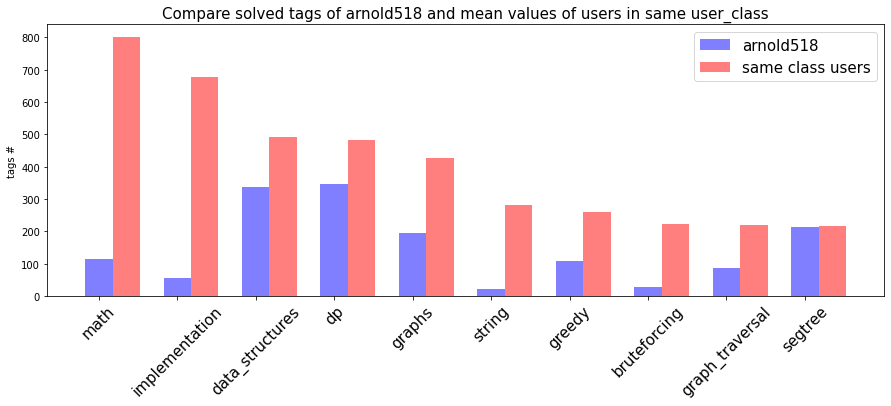

In [139]:
top10_user_10_tag = user_10_tag.head(10)

bar_width = 0.35
alpha = 0.5
index = np.arange(10)
label = top10_user_10_tag.tag

plt.figure(figsize=(15,5))
p1 = plt.bar(index, top10_user_10_tag.user, bar_width, 
             color='b', alpha=alpha,label=user_name)

p2 = plt.bar(index + bar_width, top10_user_10_tag.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+user_name+' and mean values of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (user_name, 'same class users'), fontsize=15)
plt.show()

arnold518은 같은 클래스 내 유저들에 비해 implementation, string, bruteforcing이 현저히 적음을 알 수 있습니다. <br/>
나중에 같은 Class 내 다른 유저들의 풀이 이력과 비교하여 유저가 많이 풀지 않은 tag 문제 위주로 추천하는 방법을 떠올려볼 수 있겠네요. 🤔